In [22]:
import matplotlib.pyplot as plt
import gudhi
from utils import load_hilbert_map, convert_map_dict_to_array, print_complex_attributes
from freudenthal_complex import FreudenthalComplex
import numpy as np
import copy

def process_persistence(persist):
    persistence = []

    for p in persist:
        if p[1][0] < 0.5 and p[1][1]>0.5:
            persistence.append(p)
    return persistence


In [23]:
map_data, resolution = load_hilbert_map(map_type="intel")
map_array = convert_map_dict_to_array(map_data, resolution)
# plt.imshow(map_array)
# plt.show()
fc = FreudenthalComplex(map_array)
st = fc.init_freudenthal_2d()
print_complex_attributes(st)

if st.make_filtration_non_decreasing():
    print("modified filtration value")
st.initialize_filtration()
if len(st.persistence()) <= 10:
    for i in st.persistence():
        print(i)
#graph_persistence = st.persistence()
print(st.persistence_intervals_in_dimension(1))
persistence = process_persistence(st.persistence())

611843 Simplex counts
num_vertices=102400
num_simplices=611843
[[0.09704259 0.09827826]
 [0.10589461 0.10971022]
 [0.10072354 0.10981322]
 ...
 [0.47796274 0.99421678]
 [0.47801939 0.99605342]
 [0.11671991 0.99610014]]


In [28]:
first_persistence = st.persistence_intervals_in_dimension(1)
life_span = first_persistence[:,1] - first_persistence[:,0]
winner_index = life_span.argsort()[-20:][::-1]
print(life_span)
winner_persistence = first_persistence[winner_index]

[1.23567536e-03 3.81561474e-03 9.08967604e-03 2.22887593e-03
 6.88563922e-04 1.21009836e-03 1.89354018e-03 1.08954663e-03
 4.29008217e-03 6.27103862e-03 2.78217955e-03 7.79772083e-03
 3.62770763e-03 7.65475698e-03 8.57212438e-04 1.29747645e-04
 2.04531299e-03 7.95675541e-03 3.81740890e-03 2.83854651e-03
 6.33031481e-03 1.08654346e-02 1.18985470e-02 2.05806266e-03
 1.09313975e-03 8.41661994e-03 1.78426431e-03 6.06343840e-03
 1.99377760e-03 2.89795912e-03 6.73072719e-03 5.45828056e-03
 1.86650180e-03 7.55200746e-03 7.80298152e-03 6.13707960e-03
 1.34816881e-02 3.19698069e-03 9.16883104e-03 4.80218635e-03
 1.22870189e-02 6.48466192e-03 2.63886753e-03 6.64402185e-03
 7.64575730e-05 7.03979654e-03 3.53536382e-03 7.22235524e-03
 1.35310923e-02 5.28415679e-04 2.36608476e-03 1.10393323e-02
 4.09991518e-03 6.41568486e-03 9.71846602e-04 6.06959395e-03
 8.11555798e-03 4.88735361e-03 1.33358368e-04 1.12661723e-02
 9.10102954e-03 9.54335166e-03 1.02391702e-02 1.67929595e-02
 1.16186028e-02 1.381746

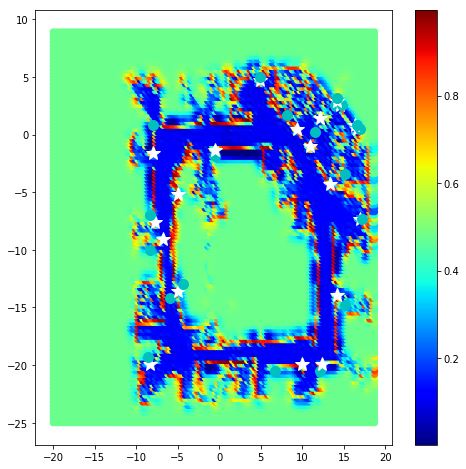

In [33]:
#gudhi.plot_persistence_diagram(persistence, alpha=0.8, legend=True)
# find the most relevant persistent in the dictionary
# Plot top 10 persistence values
# persistence_weightage = []
# persistence_index = []
#
# for index, value in enumerate(persistence):
#     if value[0]==1:
#         persistence

pose = None
plt.figure(figsize=(8, 8))
for indx, intensity in enumerate(map_data['yq']):
    for j in range(20):
        #print(j)
        p = winner_persistence[j]
        if np.isclose(intensity, p[1]):
            pose = map_data["Xq"][indx]
            plt.plot(pose[0], pose[1], "w*", markersize=15)
        if np.isclose(intensity, p[0]):
            pose = map_data["Xq"][indx]
            plt.plot(pose[0], pose[1], "ko", markersize=10)
plt.scatter(map_data["Xq"][:,0],map_data["Xq"][:,1],c=map_data["yq"], cmap="jet")
plt.colorbar()
plt.show()

# pose = None
# for indx, intensity in enumerate(map_data['yq']):
#     for j in range(5):
#         print(j)
#         p = persistence[j]
#         if p[0] == 1:
#             if np.isclose(intensity, p[1][1]):
#                 pose = map_data["Xq"][indx]
#                 plt.plot(pose[0], pose[1], "r*", markersize=12)
#             if np.isclose(intensity, p[1][0]):
#                 pose = map_data["Xq"][indx]
#                 plt.plot(pose[0], pose[1], "bo", markersize=10)
# plt.scatter(map_data["Xq"][:,0],map_data["Xq"][:,1],c=map_data["yq"])
# plt.colorbar()
# plt.show()
